In [31]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [32]:
sp500 = yf.download('^GSPC', period = '30y')
sp500.drop(columns=sp500.columns.difference(['Adj Close']), inplace=True)
sp500 = sp500.rename(columns = {'Adj Close' : 'SP500'})
sp500.head()

[*********************100%%**********************]  1 of 1 completed


,SP500
Date,
1993-10-14,466.829987
1993-10-15,469.500000
1993-10-18,468.450012
1993-10-19,466.209991
1993-10-20,466.070007


In [33]:
sector_tickers = ['^SP500-20', '^SP500-25', '^SP500-30', '^SP500-40', '^SP500-50', '^SP500-60', '^SP500-35', '^GSPE', '^SP500-55', '^SP500-15', '^SP500-45']
sector_data = {}
for ticker in sector_tickers:
  sector_data[ticker] = yf.download(ticker, period = '30y')['Adj Close']

sp500_sectors = pd.concat(sector_data, axis=1)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [34]:
sp500 = pd.concat([sp500, sp500_sectors], axis=1)
sp500 = sp500.rename(columns = {'SP500' : 'SP500_Overall', '^SP500-20' : 'Industrials', '^SP500-25' : 'Consumer_Discretionary', '^SP500-30' : 'Consumer_Staples' , '^SP500-40' : 'Financials', '^SP500-50' : 'Telecommunication', '^SP500-60' : 'Real_Estate' , '^SP500-35' : 'Health_Care', '^GSPE' : 'Energy', '^SP500-55' : 'Utilities', '^SP500-15' : 'Materials', '^SP500-45' : 'Information_Technology'})
sp500.tail()


,SP500_Overall,Industrials,Consumer_Discretionary,Consumer_Staples,Financials,Telecommunication,Real_Estate,Health_Care,Energy,Utilities,Materials,Information_Technology
Date,,,,,,,,,,,,
2023-10-09,4335.660156,866.190002,1262.979980,704.979980,549.549988,231.169998,212.440002,1520.699951,680.010010,293.440002,491.609985,3003.979980
2023-10-10,4358.240234,871.169983,1276.750000,712.570007,553.789978,231.669998,213.039993,1528.199951,679.890015,297.420013,496.920013,3008.590088
2023-10-11,4376.950195,876.599976,1282.900024,708.010010,554.409973,234.149994,217.589996,1521.699951,670.719971,302.269989,498.079987,3038.919922
2023-10-12,4349.609863,868.419983,1270.660034,699.880005,550.919983,231.559998,214.869995,1507.530029,671.309998,297.750000,490.529999,3042.100098
2023-10-13,4327.779785,860.989990,1252.160034,705.780029,552.000000,228.500000,214.839996,1516.760010,686.440002,301.000000,488.739990,2995.790039


In [35]:
print(sp500.columns)
sp500.info()

Index(['SP500_Overall', 'Industrials', 'Consumer_Discretionary',
       'Consumer_Staples', 'Financials', 'Telecommunication', 'Real_Estate',
       'Health_Care', 'Energy', 'Utilities', 'Materials',
       'Information_Technology'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7554 entries, 1993-10-14 to 2023-10-13
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SP500_Overall           7554 non-null   float64
 1   Industrials             7551 non-null   float64
 2   Consumer_Discretionary  7550 non-null   float64
 3   Consumer_Staples        7551 non-null   float64
 4   Financials              7551 non-null   float64
 5   Telecommunication       7551 non-null   float64
 6   Real_Estate             5332 non-null   float64
 7   Health_Care             7551 non-null   float64
 8   Energy                  7554 non-null   float64
 9   Utilities               7551 no

In [36]:
for col in sp500.columns:
  log_returns = np.log(sp500[col].pct_change() + 1)
  log_returns[~np.isfinite(log_returns)] = np.nan
  sp500[f'Log Return_{col}'] = log_returns

sp500['Volatility_20'] = sp500['Log Return_SP500_Overall'].rolling(20).std() * np.sqrt(252)
sp500['Volatility_60'] = sp500['Log Return_SP500_Overall'].rolling(60).std() * np.sqrt(252)
sp500['Volatility_Ratio'] = sp500['Volatility_20'] / sp500['Volatility_60']
sp500.tail()

,SP500_Overall,Industrials,Consumer_Discretionary,Consumer_Staples,Financials,Telecommunication,Real_Estate,Health_Care,Energy,Utilities,...,Log Return_Telecommunication,Log Return_Real_Estate,Log Return_Health_Care,Log Return_Energy,Log Return_Utilities,Log Return_Materials,Log Return_Information_Technology,Volatility_20,Volatility_60,Volatility_Ratio
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-09,4335.660156,866.190002,1262.979980,704.979980,549.549988,231.169998,212.440002,1520.699951,680.010010,293.440002,...,0.009475,0.013363,0.003570,0.034743,0.010035,0.001466,0.004297,0.130419,0.114397,1.140058
2023-10-10,4358.240234,871.169983,1276.750000,712.570007,553.789978,231.669998,213.039993,1528.199951,679.890015,297.420013,...,0.002161,0.002820,0.004920,-0.000176,0.013472,0.010743,0.001533,0.131732,0.114656,1.148933
2023-10-11,4376.950195,876.599976,1282.900024,708.010010,554.409973,234.149994,217.589996,1521.699951,670.719971,302.269989,...,0.010648,0.021133,-0.004262,-0.013579,0.016175,0.002332,0.010031,0.132910,0.113992,1.165958
2023-10-12,4349.609863,868.419983,1270.660034,699.880005,550.919983,231.559998,214.869995,1507.530029,671.309998,297.750000,...,-0.011123,-0.012579,-0.009356,0.000879,-0.015066,-0.015274,0.001046,0.129270,0.114385,1.130129
2023-10-13,4327.779785,860.989990,1252.160034,705.780029,552.000000,228.500000,214.839996,1516.760010,686.440002,301.000000,...,-0.013303,-0.000140,0.006104,0.022288,0.010856,-0.003656,-0.015340,0.123945,0.114051,1.086755


In [37]:
sp500 = sp500[sp500.index >= datetime.datetime(2005, 1, 1)]
sp500.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4728 entries, 2005-01-03 to 2023-10-13
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SP500_Overall                      4728 non-null   float64
 1   Industrials                        4725 non-null   float64
 2   Consumer_Discretionary             4725 non-null   float64
 3   Consumer_Staples                   4725 non-null   float64
 4   Financials                         4725 non-null   float64
 5   Telecommunication                  4725 non-null   float64
 6   Real_Estate                        4603 non-null   float64
 7   Health_Care                        4725 non-null   float64
 8   Energy                             4728 non-null   float64
 9   Utilities                          4725 non-null   float64
 10  Materials                          4725 non-null   float64
 11  Information_Technology             472

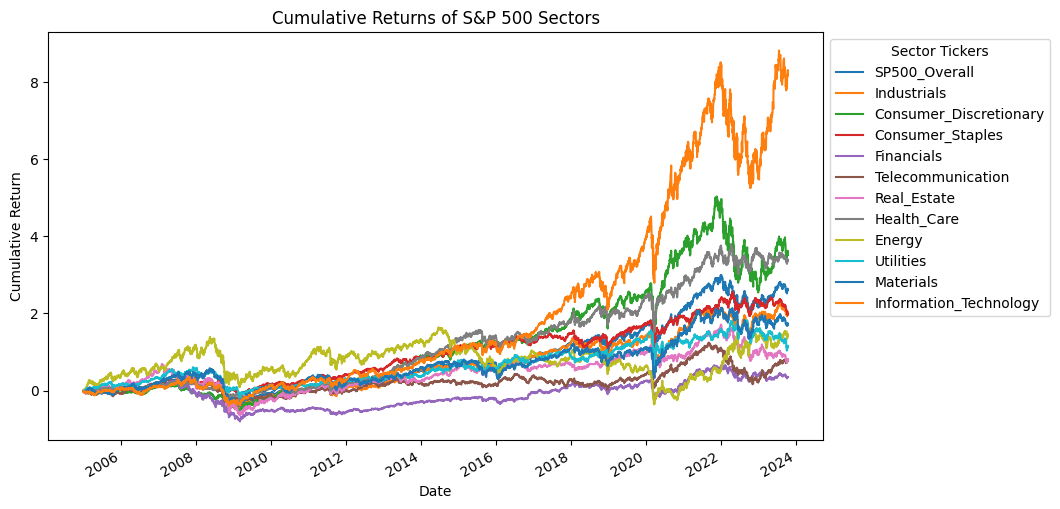

In [38]:
start_column = 'SP500_Overall'
end_column = 'Information_Technology'

# Using loc to access columns by label
sp500_returns= sp500.loc[:, start_column:end_column]

daily_returns = sp500_returns.pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(10, 6))
plt.title('Cumulative Returns of S&P 500 Sectors')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(title='Sector Tickers', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()